# Pandas

## étude des passagers du Titanic

Pandas est construit sur la base de numpy

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
data = pd.read_excel('titanic3.xls')

In [79]:
data.shape #taille de la base de donnée

(1309, 14)

In [80]:
data.columns #présente les différentes colonnes

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [81]:
data.head() #présente les premières lignes

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [82]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
#supprime des colonnes

In [83]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [84]:
data.describe() #produits les stats de base pour chaque colonne
#la ligne count montre que le nombre de ligne renseignée est différent entre pclass/survived et age

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [85]:
# data.fillna(data['age'].mean()) remplace des valeurs manquantes par des valeurs par défaut => corrompt le data
data = data.dropna(axis = 0) #supprime les lignes avec valeur manquante

In [86]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [87]:
data['pclass'].value_counts() #montre le nombre de personne en 1er, 2nd, 3nd classe

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot: >

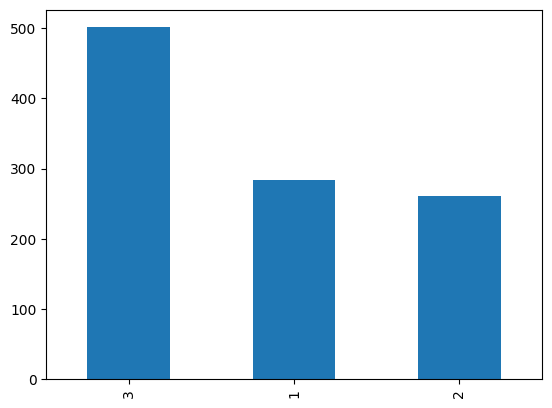

In [88]:
data['pclass'].value_counts().plot.bar()

<AxesSubplot: >

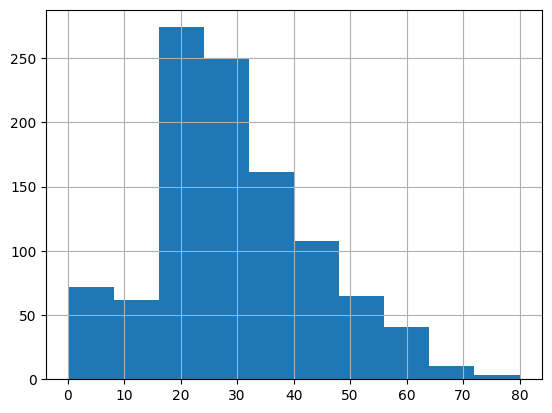

In [89]:
data['age'].hist()

In [90]:
data.groupby(['sex']).mean() #regroupe un groupe en fonction d'une colonne

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [91]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [92]:
data['age'] #les dataframes sont un ensemble de Séries numpy (tableau à une dimension)

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [93]:
#data = data.set_index('pclass') #définit une autre colonne comme index
#data['age']

In [94]:
data['age'][0: 10] #sélectionne les dix premières valeurs

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\1409392498.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['age'][0: 10] #sélectionne les dix premières valeurs


0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

In [95]:
data['age'][0 : 10] < 18 #génère un masque

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\609916700.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['age'][0 : 10] < 18 #génère un masque


0    False
1     True
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: age, dtype: bool

In [96]:
data[data['age'] < 18] #sélectionne uniquement les passagers mineurs

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
55,1,1,female,14.0000
...,...,...,...,...
1265,3,0,female,10.0000
1275,3,0,male,16.0000
1279,3,0,female,14.0000
1300,3,1,female,15.0000


In [97]:
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [98]:
data[data['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [99]:
data.iloc[0: 10, 0: 3]

,pclass,survived,sex
0,1,1,female
1,1,1,male
2,1,0,female
3,1,0,male
4,1,0,female
5,1,1,male
6,1,1,female
7,1,0,male
8,1,1,female
9,1,0,male


In [100]:
data.loc[0:10, ['age', 'sex', 'pclass']]

,age,sex,pclass
0,29.0000,female,1
1,0.9167,male,1
2,2.0000,female,1
3,30.0000,male,1
4,25.0000,female,1
5,48.0000,male,1
6,63.0000,female,1
7,39.0000,male,1
8,53.0000,female,1
9,71.0000,male,1


Exercice: replacer les valeurs d'âge par palier par un chiffre

In [101]:
'''data.loc[data['age'] <= 20, 'age'] = 0
data.loc[(data['age'] > 20) &( data['age'] <= 30 ), 'age'] = 1
data.loc[(data['age'] > 30) &( data['age'] <= 40 ), 'age'] = 2
data.loc[data['age'] > 40, 'age'] = 3

data.head()'''

"data.loc[data['age'] <= 20, 'age'] = 0\ndata.loc[(data['age'] > 20) &( data['age'] <= 30 ), 'age'] = 1\ndata.loc[(data['age'] > 30) &( data['age'] <= 40 ), 'age'] = 2\ndata.loc[data['age'] > 40, 'age'] = 3\n\ndata.head()"

In [102]:
'''def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age>30) & (age <=40):
        return '30-40 ans'
    elif age > 40:
        return '> 40 ans'
data = data['age'].map(category_ages)'''

"def category_ages(age):\n    if age <= 20:\n        return '<20 ans'\n    elif (age > 20) & (age <= 30):\n        return '20-30 ans'\n    elif (age>30) & (age <=40):\n        return '30-40 ans'\n    elif age > 40:\n        return '> 40 ans'\ndata = data['age'].map(category_ages)"

In [103]:

#data['sex'].map({'male':0, 'female':1})
#data['sex'].replace(['male', 'female'], [0, 1])
data['sex'].astype('category').cat.codes #évite de remplir toutes les catégories pour les substituer


0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8

## Time Series

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
bitcoin = pd.read_csv('bitcoin-BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<AxesSubplot: xlabel='Date'>

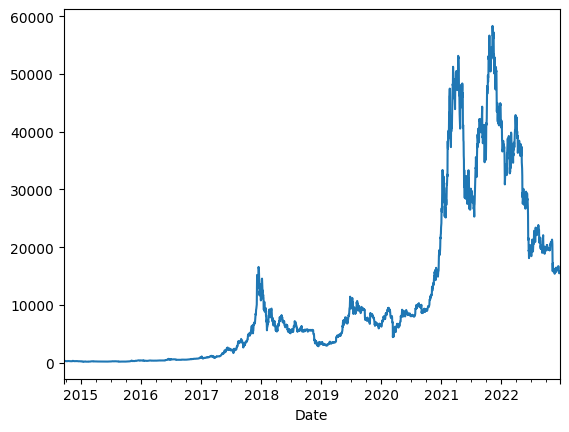

In [106]:
bitcoin['Close'].plot()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\242990758.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].plot()


<AxesSubplot: xlabel='Date'>

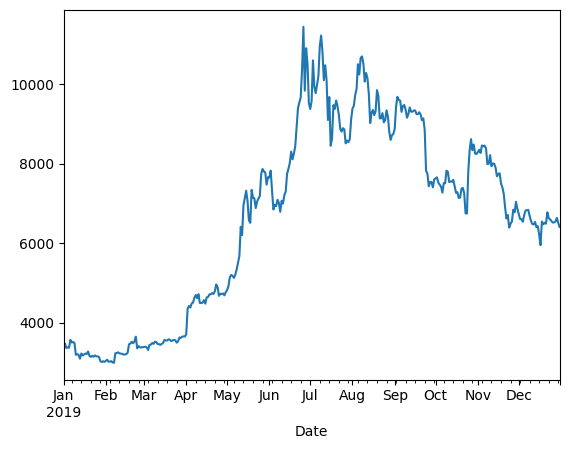

In [107]:
bitcoin['2019']['Close'].plot()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\361147746.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019-09']['Close'].plot()


<AxesSubplot: xlabel='Date'>

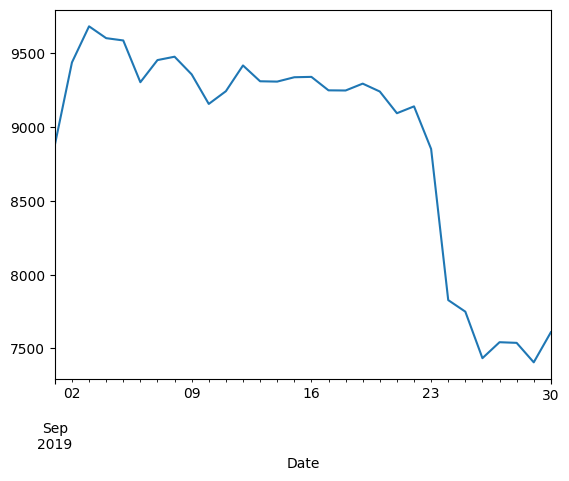

In [108]:
bitcoin['2019-09']['Close'].plot()

<AxesSubplot: xlabel='Date'>

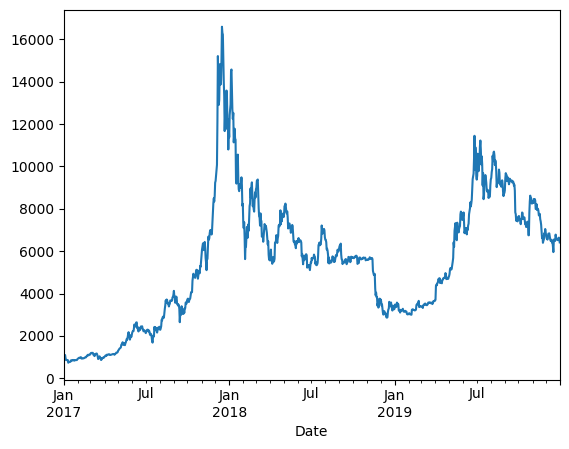

In [109]:
bitcoin['2017':'2019']['Close'].plot()
#bitcoin.loc['2017':'2019','Close'].plot()

Pandas transforme automatiquement les dates, si jamais, marche pas pd.to_datetime('2019/03/20')

gère aussi le temps y compris en milliseconde

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\1213566261.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].resample('M').plot()


Date
2019-01-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-02-28    AxesSubplot(0.125,0.11;0.775x0.77)
2019-03-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-04-30    AxesSubplot(0.125,0.11;0.775x0.77)
2019-05-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-06-30    AxesSubplot(0.125,0.11;0.775x0.77)
2019-07-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-08-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-09-30    AxesSubplot(0.125,0.11;0.775x0.77)
2019-10-31    AxesSubplot(0.125,0.11;0.775x0.77)
2019-11-30    AxesSubplot(0.125,0.11;0.775x0.77)
2019-12-31    AxesSubplot(0.125,0.11;0.775x0.77)
Freq: M, Name: Close, dtype: object

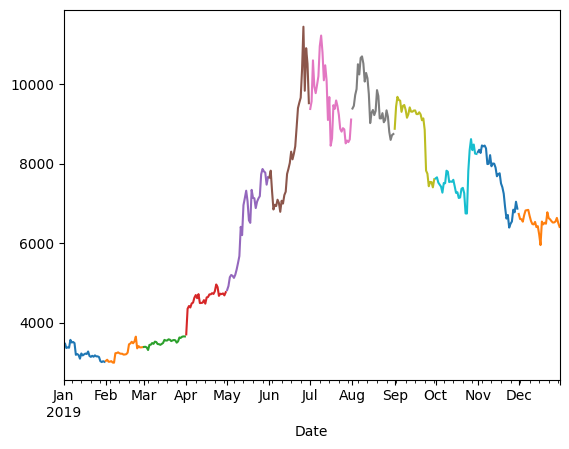

In [110]:
#regrouper les données suivant une fréquences
bitcoin['2019']['Close'].resample('M').plot()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\3120660384.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].resample('2W').mean().plot()


<AxesSubplot: xlabel='Date'>

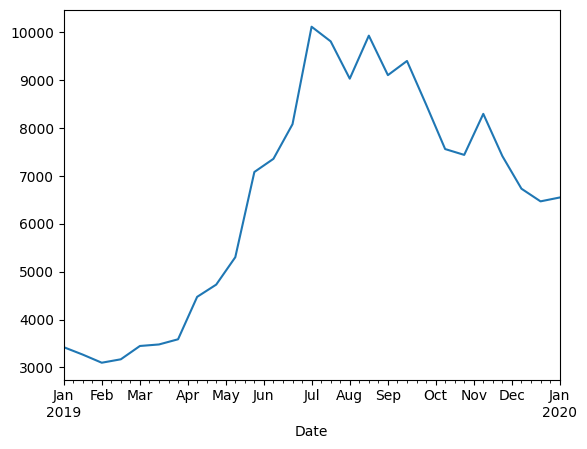

In [111]:
bitcoin['2019']['Close'].resample('2W').mean().plot()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\2246520903.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].resample('M').std().plot()


<AxesSubplot: xlabel='Date'>

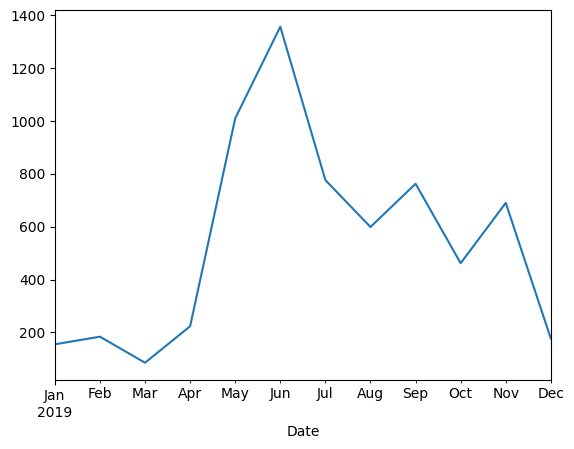

In [112]:
bitcoin['2019']['Close'].resample('M').std().plot()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\3404780393.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].plot()
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\3404780393.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14236\3404780393.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bi

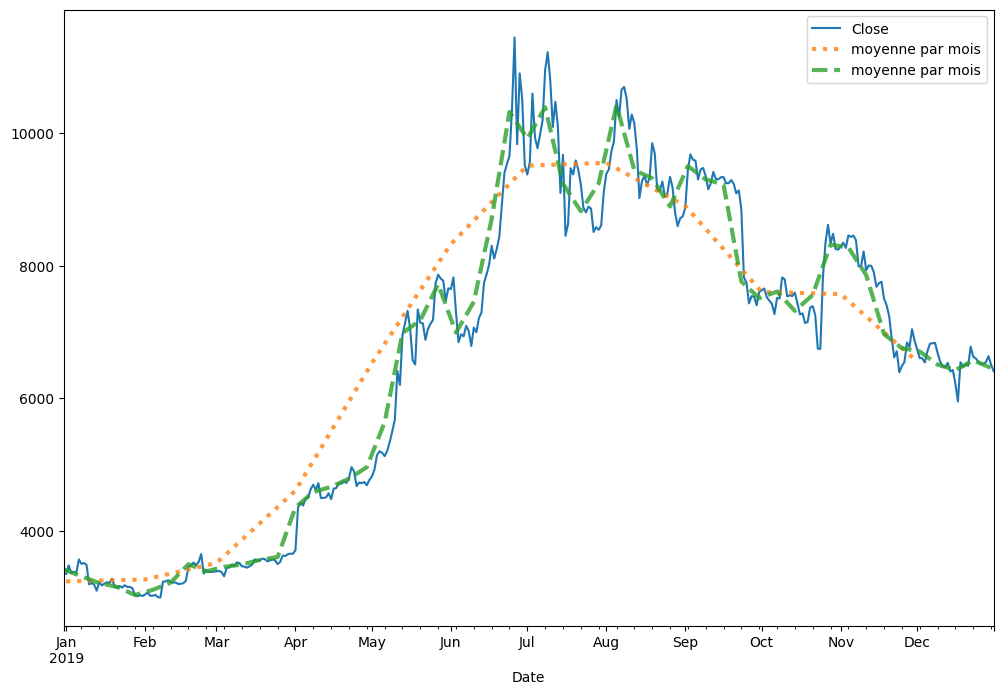

In [113]:
plt.figure(figsize=(12, 8))
bitcoin['2019']['Close'].plot()
bitcoin['2019']['Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin['2019']['Close'].resample('W').mean().plot(label='moyenne par mois', lw='3', ls='--', alpha=0.8)
plt.legend()

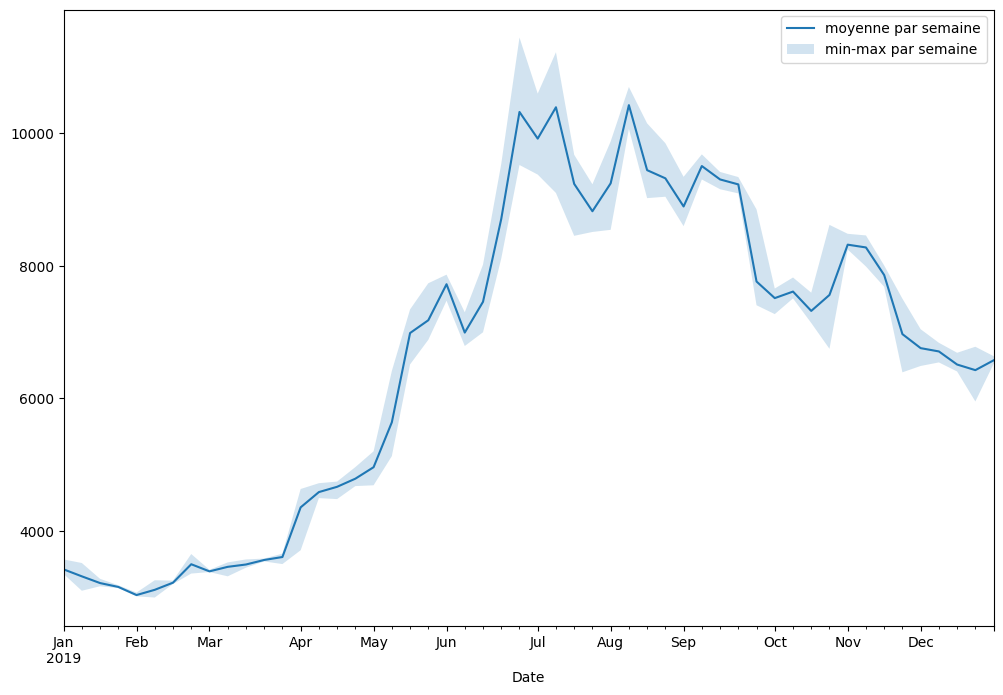

In [114]:
m = bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
plt.legend()

Moving Average = caculer une moyenne sur une fenêtre de valeur

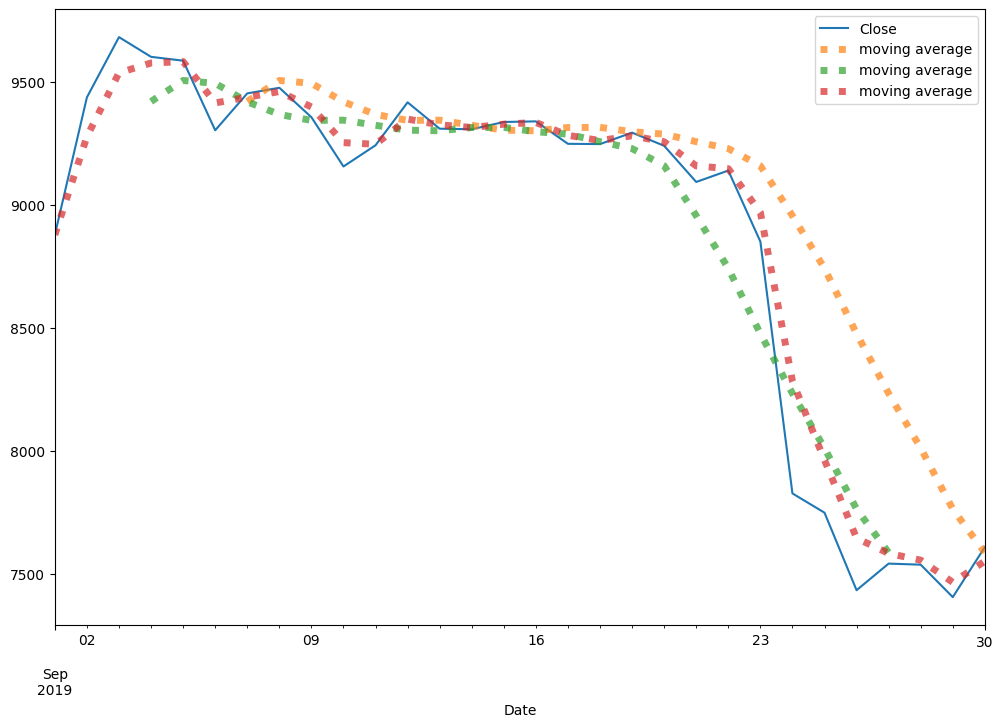

In [115]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=5, ls=':', alpha=0.7)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='moving average', lw=5, ls=':', alpha=0.7)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='moving average', lw=5, ls=':', alpha=0.7)

plt.legend()

In [116]:
ethereum = pd.read_csv('etherium-ETH-EUR.csv', index_col='Date', parse_dates=True)
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


<AxesSubplot: xlabel='Date'>

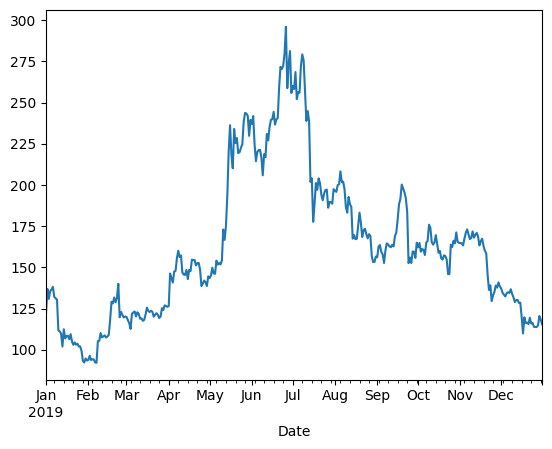

In [117]:
ethereum.loc['2019', 'Close'].plot()

In [118]:
btc_eth= pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))
#fusionne deux dataframe, seulement sur les dates en commun

In [119]:
pd.merge(bitcoin, ethereum, on='Date', how='outer', suffixes=('_btc', '_eth'))
#fusionne deux dataframe, même sur les dates non commun

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-17,15707.926758,15857.841797,15674.422852,15852.651367,15852.651367,13651972395,1102.176147,1122.322998,1099.498169,1121.477783,1121.477783,4.792353e+09
2022-12-18,15853.140625,15875.103516,15760.838867,15832.535156,15832.535156,10321068134,1121.457886,1127.202393,1110.185303,1119.290527,1119.290527,3.165087e+09
2022-12-19,15833.540039,15861.481445,15459.555664,15491.159180,15491.159180,16227470460,1119.331177,1125.628662,1093.960693,1100.242310,1100.242310,4.658396e+09


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

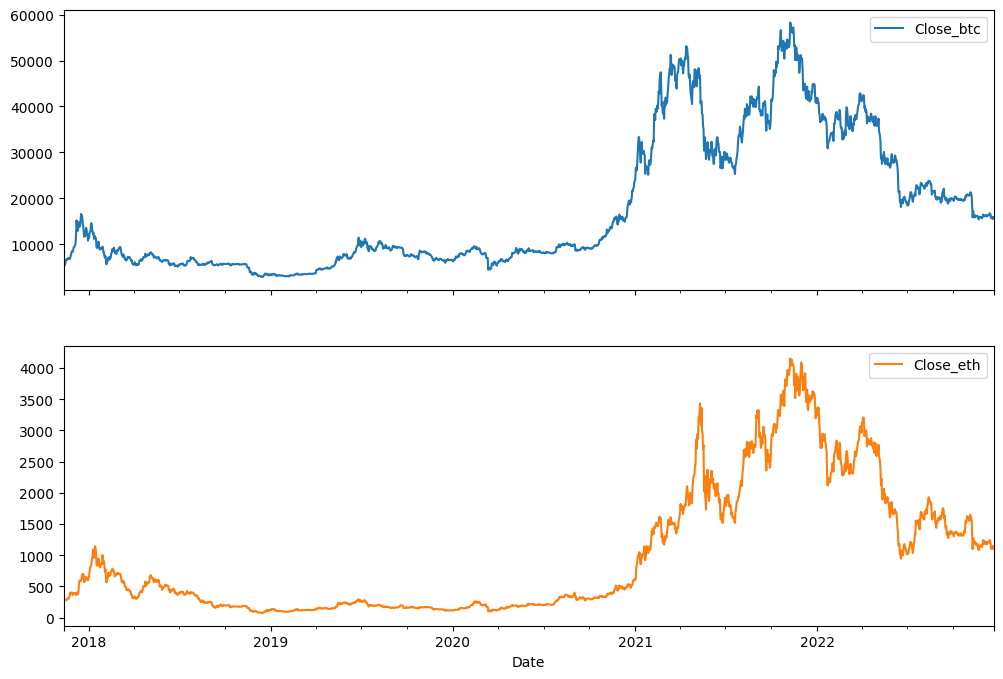

In [122]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

In [123]:
btc_eth[['Close_btc', 'Close_eth']].corr() #matrice de corrélation

,Close_btc,Close_eth
Close_btc,1.000000,0.928173
Close_eth,0.928173,1.000000
